<a href="https://colab.research.google.com/github/Laisalkk/tugas/blob/main/233083010055_Laisal_kaffi_TUGAS_EDA%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Membaca file CSV
file_path = '/content/drive/My Drive/Colab Notebooks/new_catur.csv'
df = pd.read_csv(file_path)

# Menampilkan data awal dan informasi kolom
display(df.head())
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20058 non-null  object
 1   rated           20058 non-null  bool  
 2   turns           20058 non-null  int64 
 3   victory_status  20058 non-null  object
 4   winner          20058 non-null  object
 5   increment_code  20058 non-null  object
 6   white_id        20058 non-null  object
 7   white_rating    20058 non-null  int64 
 8   black_id        20058 non-null  object
 9   black_rating    20058 non-null  int64 
 10  moves           20058 non-null  object
 11  opening_eco     20058 non-null  object
 12  opening_name    20058 non-null  object
 13  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(9)
memory usage: 2.0+ MB
None


              turns  white_rating  black_rating   opening_ply
count  20058.000000  20058.000000  20058.000000  20058.000000
mean      60.465999   1596.631868   1588.831987      4.816981
std       33.570585    291.253376    291.036126      2.797152
min        1.000000    784.000000    789.000000      1.000000
25%       37.000000   1398.000000   1391.000000      3.000000
50%       55.000000   1567.000000   1562.000000      4.000000
75%       79.000000   1793.000000   1784.000000      6.000000
max      349.000000   2700.000000   2723.000000     28.000000
 


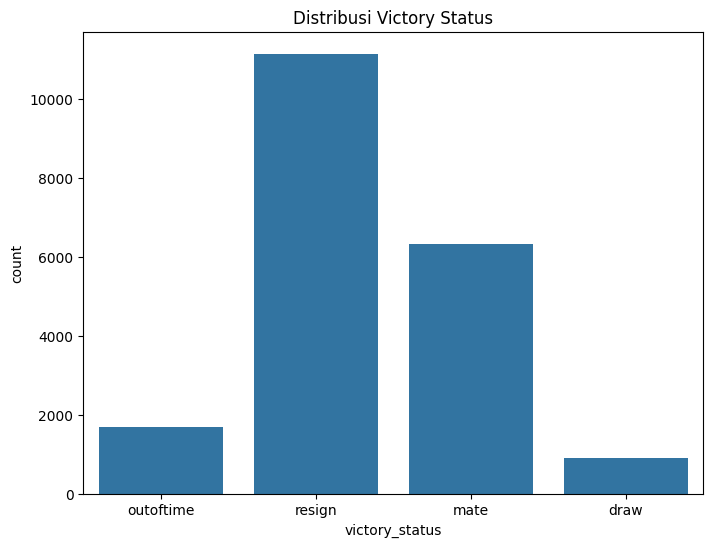

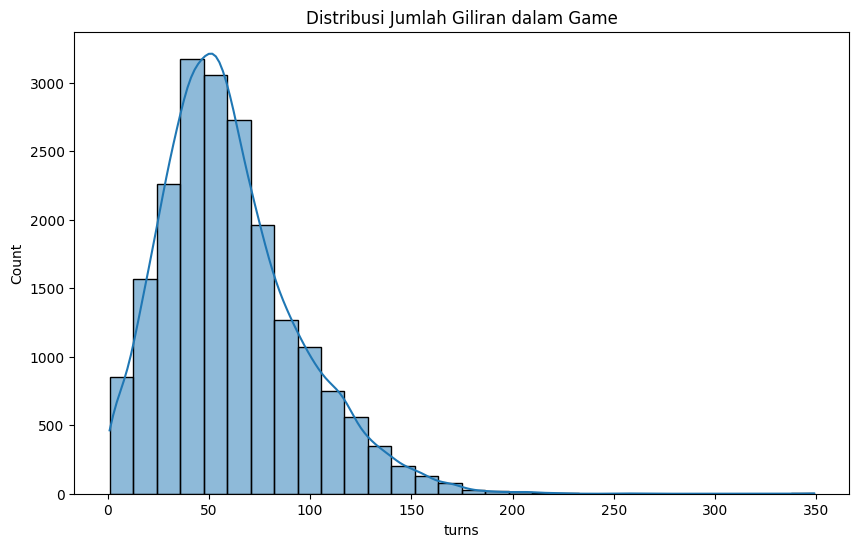

In [ ]:
# Mengisi missing values jika ada
df.fillna(method='ffill', inplace=True)

# Menampilkan deskripsi statistik dari data numerik
print(df.describe())

print(' ')

# Visualisasi distribusi `victory_status`
plt.figure(figsize=(8, 6))
sns.countplot(x='victory_status', data=df)
plt.title('Distribusi Victory Status')
plt.show()

print(' ')

# Membuat histogram untuk distribusi jumlah giliran (turns)
plt.figure(figsize=(10, 6))
sns.histplot(df['turns'], bins=30, kde=True)
plt.title('Distribusi Jumlah Giliran dalam Game')
plt.show()


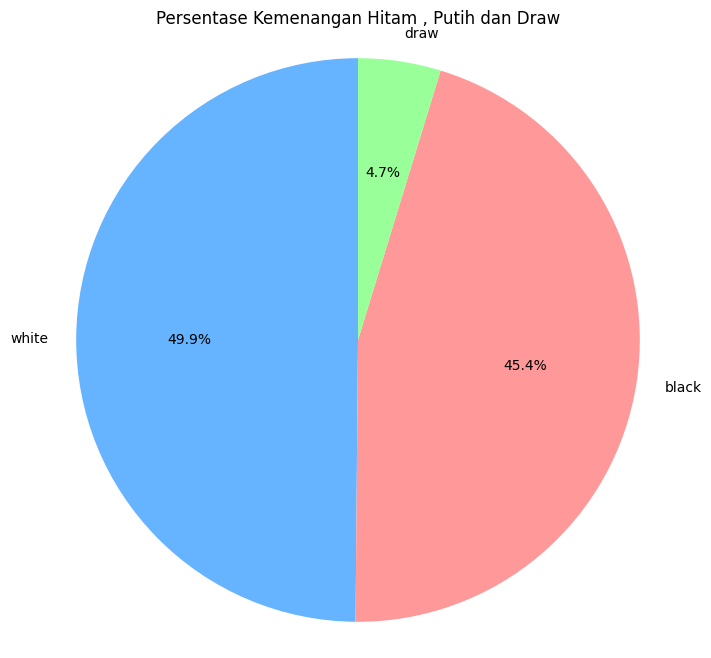

In [ ]:
# Mengisi nilai 'draw' untuk pertandingan yang tidak memiliki pemenang di kolom 'winner'
df['winner'].fillna('draw', inplace=True)

# Menghitung jumlah kemenangan putih, hitam, dan draw
winner_counts = df['winner'].value_counts()

# Membuat pie chart untuk presentase hasil pertandingan
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Warna untuk white, black, draw
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Persentase Kemenangan Hitam , Putih dan Draw')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

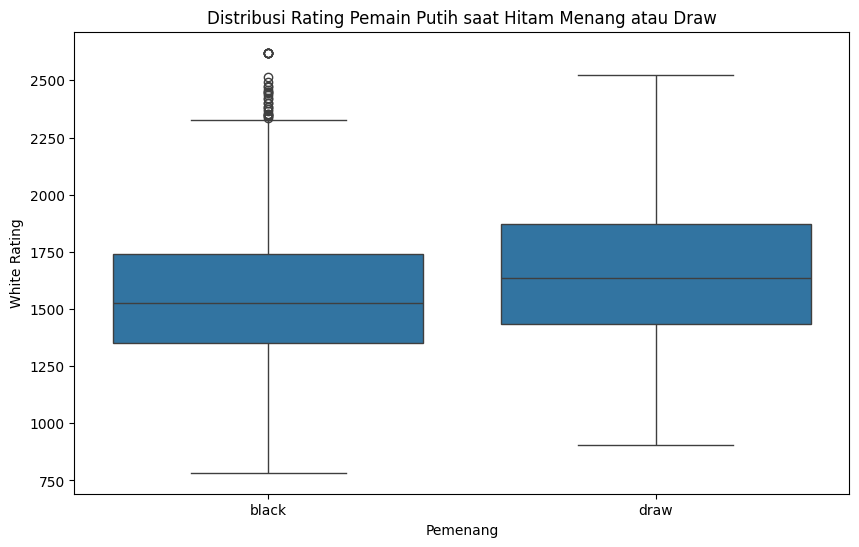

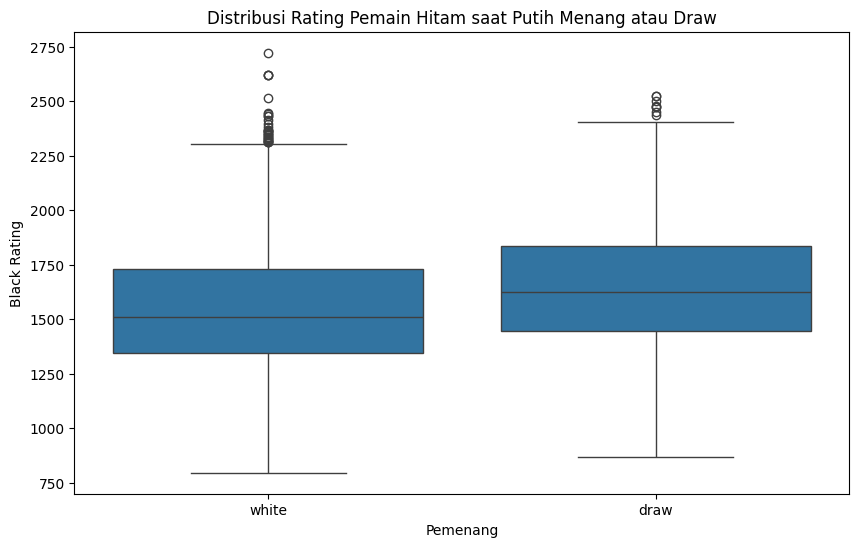

In [ ]:
# Saat Hitam Menang: Kita melihat rating putih dalam pertandingan tersebut, yang kalah.
# Saat Putih Menang: Kita melihat rating hitam dalam pertandingan tersebut, yang kalah.


# Filter data untuk white_rating saat hitam menang atau draw
df_white_filtered = df[df['winner'].isin(['black', 'draw'])]

# Membuat box plot untuk white_rating ketika hitam menang atau draw
plt.figure(figsize=(10, 6))
sns.boxplot(x='winner', y='white_rating', data=df_white_filtered)
plt.title('Distribusi Rating Pemain Putih saat Hitam Menang atau Draw')
plt.xlabel('Pemenang')
plt.ylabel('White Rating')
plt.show()

# Filter data untuk black_rating saat putih menang atau draw
df_black_filtered = df[df['winner'].isin(['white', 'draw'])]

# Membuat box plot untuk black_rating ketika putih menang atau draw
plt.figure(figsize=(10, 6))
sns.boxplot(x='winner', y='black_rating', data=df_black_filtered)
plt.title('Distribusi Rating Pemain Hitam saat Putih Menang atau Draw')
plt.xlabel('Pemenang')
plt.ylabel('Black Rating')
plt.show()



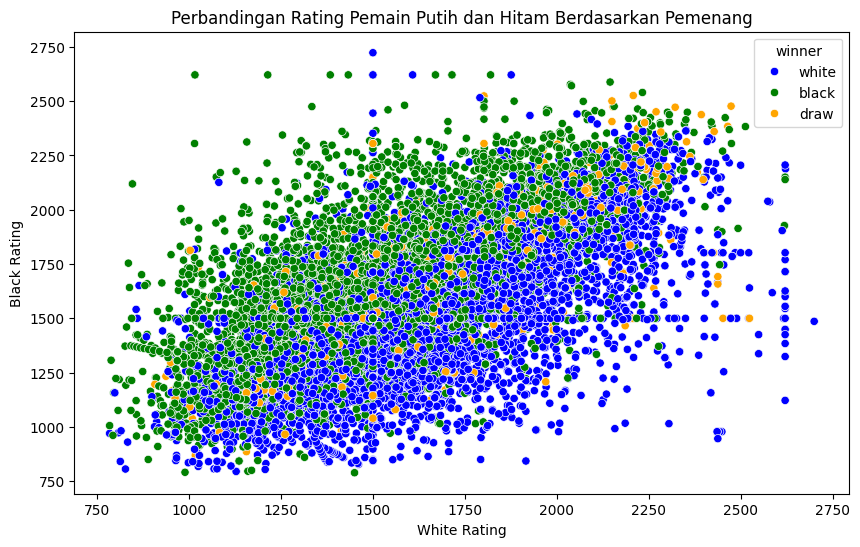

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='white_rating', y='black_rating', hue='winner', data=df, palette={'white':'blue', 'black':'green', 'draw':'orange'})
plt.title('Perbandingan Rating Pemain Putih dan Hitam Berdasarkan Pemenang')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()

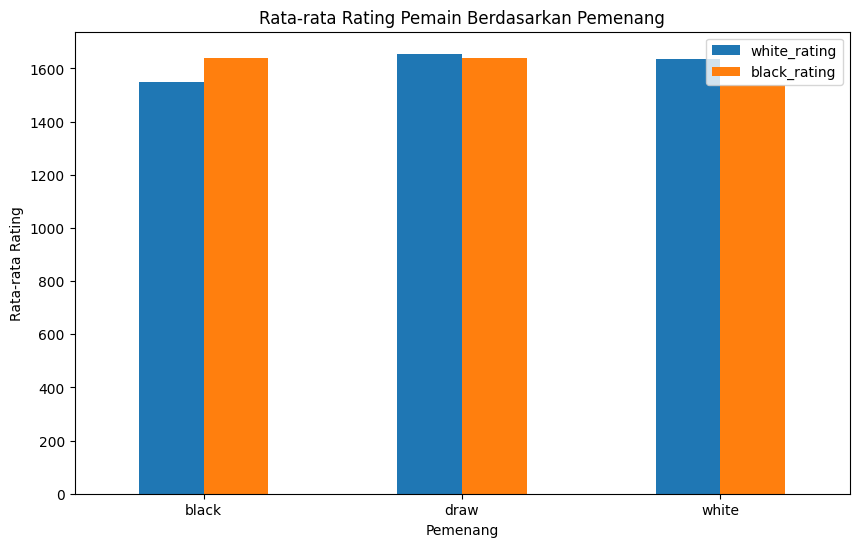

In [ ]:
# Menghitung rata-rata rating berdasarkan pemenang
avg_ratings = df.groupby('winner')[['white_rating', 'black_rating']].mean()

# Membuat bar plot
avg_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Rating Pemain Berdasarkan Pemenang')
plt.ylabel('Rata-rata Rating')
plt.xlabel('Pemenang')
plt.xticks(rotation=0)
plt.show()


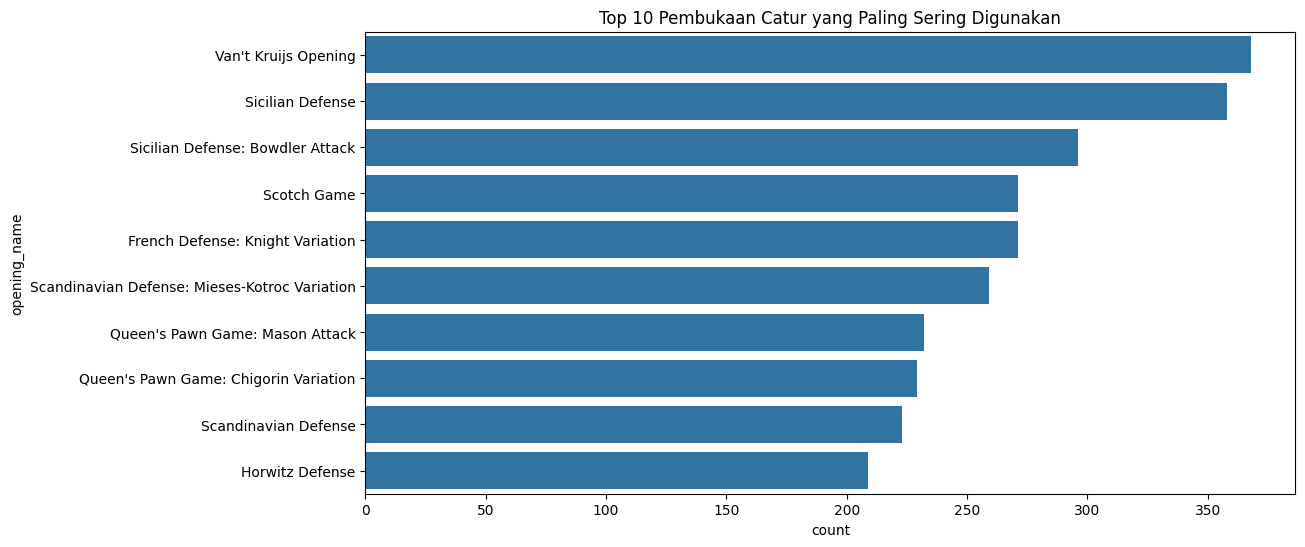

In [ ]:

# Visualisasi pembukaan yang paling sering digunakan
top_openings = df['opening_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_openings, y=top_openings.index)
plt.title('Top 10 Pembukaan Catur yang Paling Sering Digunakan')
plt.show()
